## Практическое задание № 7 ##

### Урок 7. Многомерный статистический анализ. Линейная регрессия

1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.
2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).
3. В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?
4. *Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Задача N 1
Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [8]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
b = (np.mean(X * y) - np.mean(X) * np.mean(y)) / (np.mean(X ** 2) - np.mean(X) ** 2)
b

2.620538882402765

In [9]:
a = np.mean(y) - b * np.mean(X)
a

444.1773573243596

In [10]:
y_hat = a + b * X
y_hat

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

In [11]:
y

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

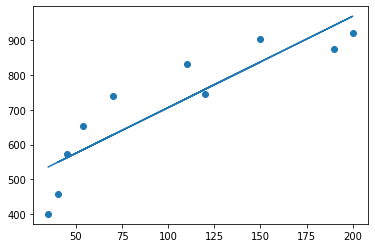

In [12]:
plt.scatter(X, y)
plt.plot(X, a + b * X)
plt.show()

> a = 444.177
>
> b=  2.620

In [15]:
X = X[..., None]
X

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [16]:
y = y[..., None]
y

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [18]:
from numpy.linalg import inv

$$\hat{B} = (X^{T}*X)^{-1}*X^{T}*y $$

In [23]:
b = inv(X.T @ X) @ X.T @ y
b[0][0]

5.889820420132689

> b = 5.89

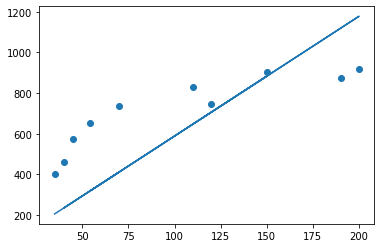

In [25]:
plt.scatter(X, y)
plt.plot(X, b * X)
plt.show()

#### Задача N 2
Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [59]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

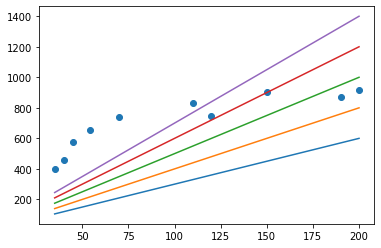

In [61]:
X1 = X.copy()
X1.sort()
plt.scatter(X, y)
plt.plot(X1, 3 * X1)
plt.plot(X1, 4 * X1)
plt.plot(X1, 5 * X1)
plt.plot(X1, 6 * X1)
plt.plot(X1, 7 * X1)
plt.show()

> начальное значение для b = 3, дельта положительная
>

$$mse' = \frac{2}{n} {\sum\limits_{i=1}^{n} x_i(b x_i - y_i) }$$

In [31]:
def mse_(X, y, b):
    return np.sum((b * X - y) ** 2) / len(X)

In [62]:
def mse_p(X, y, b):
    return (2 / len(X)) * np.sum((b * X - y) * X)

In [63]:
B1 = 3
alpha = 1e-6

In [64]:
for i in range(1000):
    B1 -= alpha * mse_p(X, y, B1)
    if i % 100 == 0:
        print(f'B1={B1} mse={mse_(X, y, B1)}')

B1=3.0796238 mse=165313.49342220597
B1=5.717902217801731 mse=56924.037790840724
B1=5.879303053454158 mse=56518.382314353905
B1=5.889177003668632 mse=56516.86411902167
B1=5.88978105811757 mse=56516.85843706442
B1=5.889818012099447 mse=56516.85841579931
B1=5.889820272817466 mse=56516.85841571972
B1=5.889820411120448 mse=56516.85841571941
B1=5.889820419581351 mse=56516.8584157194
B1=5.8898204200989595 mse=56516.85841571941


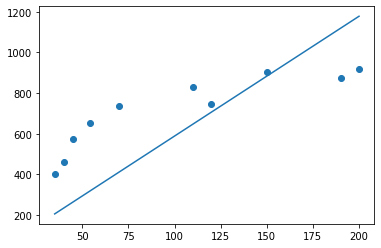

In [65]:
X1 = X.copy()
X1.sort()
plt.scatter(X, y)
plt.plot(X1, 5.889820 * X1)
plt.show()

> B1=5.889820420132673 при min mse =56516.85841571943

#### Задача N 3
В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?
> Распределение Стьюдета используется, если нам не известна дисперсия генеральной совокупности, если дисперсия известна, то используется таблица значений функции Лапласа (z)

#### Задача N 4*
Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

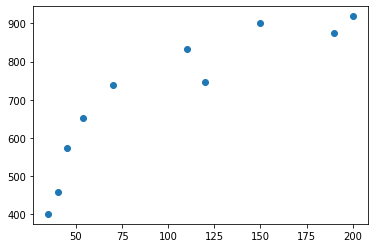

In [73]:
X1 = X.copy()
plt.scatter(X, y)
plt.show()

> Предположительно, точка пересечения может лежать в пределах 300-600
> Предположительно, коэффициент наклона может лежать в пределах 3-6

In [103]:
B0 = 300
# B0 = 0.1
B1 = 3
alpha = 1e-5

In [104]:
def mse2_(B0, B1, X, y):
    return np.sum((B0 + B1 * X - y) ** 2) / len(X)

In [105]:
def mse2_p(B0, B1, X, y):
    y_pred = B0 + B1 * X
    B0_n = np.sum((y_pred - y))
    B1_n = np.sum((y_pred - y) * X)
    return B0_n, B1_n

In [106]:
n = len(X)
for i in range(4000000):
    _B0, _B1 = mse2_p(B0, B1, X, y)
    B0 -= alpha * (2 / n) * _B0
    B1 -= alpha * (2 / n) * _B1
    if i % 300000 == 0:
        print(f'Iter: {i}, B0={B0}, B1={B1}, mse={mse2_(B0, B1, X, y)}')

Iter: 0, B0=300.002114, B1=3.187838, mse=15103.503561919973
Iter: 300000, B0=412.70550898684536, B1=2.852185600670314, mse=6721.663520869918
Iter: 600000, B0=437.3072304674101, B1=2.671106053527479, mse=6482.386840728138
Iter: 900000, B0=442.67764740823196, B1=2.6315774104453076, mse=6470.984726493919
Iter: 1200000, B0=443.84997911441314, B1=2.6229485307701923, mse=6470.441388091975
Iter: 1500000, B0=444.10589250893776, B1=2.62106489504068, mse=6470.415496699123
Iter: 1800000, B0=444.16175695852775, B1=2.6206537079926058, mse=6470.414262911448
Iter: 2100000, B0=444.17395185256, B1=2.620563948180856, mse=6470.414204118471
Iter: 2400000, B0=444.17661392908536, B1=2.6205443541206574, mse=6470.414201316844
Iter: 2700000, B0=444.1771950453659, B1=2.6205400768479064, mse=6470.414201183339
Iter: 3000000, B0=444.17732189977255, B1=2.6205391431433886, mse=6470.41420117698
Iter: 3300000, B0=444.17734959137135, B1=2.620538939320978, mse=6470.414201176673
Iter: 3600000, B0=444.1773556362903, B1=2.

> На итерации 2100000 ошибка стабилизировалась при B0 = 444,17 и B1 = 2,62

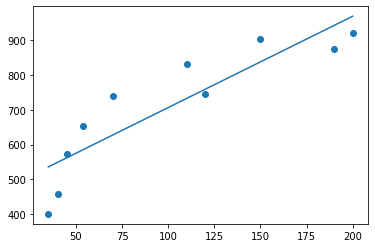

In [116]:
B0 = 444.17
B1 = 2.62
X1 = X.copy()
X1.sort()
plt.scatter(X, y)
plt.plot(X1, B0 + B1*X1)
plt.show()

